**Epsilon 0.1**

1- clean the data:
- [ ] Clean all the row, no imputaing. if there’s a column with a lot of missing values just delete it.


2- applying Laplace noise:
- [ ] For the privacy budget in each run, the values become different so it is better to have a Seed, so no matter how we run the code the noise budget stays the same

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seed
np.random.seed(42)

- [ ] We have to apply the noise for these variables also: education.num, capital.gain, capital.loss and hours.per.week. And if we can apply it in “education” which is a categorical attribute it would be good. (check if there’s a way)

In [ ]:
df = pd.read_excel('adult_withoutnull.xlsx')

def add_laplace_noise(data, epsilon, sensitivity):
    """Adds Laplace noise to data."""
    noise = np.random.laplace(0, sensitivity / epsilon, size=data.shape)
    return data + noise

epsilon_values = [0.1, 0.5, 1.0]
sensitivity_numerical = 1

numerical_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']
non_negative_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']

for epsilon in epsilon_values:
    for column in numerical_columns:
        perturbed_column = f"{column}_perturbed_{epsilon}"
        df[perturbed_column] = add_laplace_noise(df[column], epsilon, sensitivity_numerical)

        min_value = 0 if column in non_negative_columns else df[column].min()
        max_value = df[column].max()

        df[perturbed_column] = df[perturbed_column].clip(lower=min_value, upper=max_value)

# Printing the head of the dataframe to check the results
perturbed_columns = [f"{col}_perturbed_{epsilon}" for col in numerical_columns for epsilon in epsilon_values]
print("Perturbed Columns:")
print(df[perturbed_columns].head())


Perturbed Columns:
   education.num_perturbed_0.1  education.num_perturbed_0.5  \
0                     6.110908                     8.479882   
1                    16.000000                     3.573132   
2                    16.000000                     8.289883   
3                    11.197954                     9.691117   
4                     0.000000                     2.219914   

   education.num_perturbed_1.0  capital.gain_perturbed_0.1  \
0                     9.758552                   23.597805   
1                     5.746364                    0.000000   
2                    12.771617                    1.586338   
3                     7.169068                   25.712148   
4                     2.854569                   12.767022   

   capital.gain_perturbed_0.5  capital.gain_perturbed_1.0  \
0                    0.000000                     0.00000   
1                    5.063126                     0.00000   
2                    0.000000                 

In [ ]:
# Apply Laplace noise to 'education'
sensitivity_categorical = 1
epsilon_categorical = 0.1

education_counts = df['education'].value_counts()
noise = np.random.laplace(0, sensitivity_categorical / epsilon_categorical, size=len(education_counts))
noisy_counts = education_counts + noise
df['education_perturbed_0.1'] = df['education'].map(noisy_counts)
df['education_perturbed_0.1'] = df['education_perturbed_0.1'].clip(lower=0)

- [ ] The Age after applying the noise becomes negative values which is impossible. check in the original dataset what is the minimum and higher ages and we will put a range. It will be the same for the other attributes.

In [ ]:
# 1- for all variables do the minimum and higher values so it does not become negative as in
# capital gain it’s impossible to be negative. please do this for all

numerical_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']
non_negative_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']

for column in numerical_columns:
    min_value = 0 if column in non_negative_columns else df[column].min()
    max_value = df[column].max()
    df[column] = df[column].clip(lower=min_value, upper=max_value)

perturbed_columns = numerical_columns
print("Perturbed Columns:")
print(df[perturbed_columns].head())


Perturbed Columns:
   education.num  capital.gain  capital.loss  hours.per.week  age
0              9             0          4356              18   82
1              4             0          3900              40   54
2             10             0          3900              40   41
3              9             0          3770              45   34
4              6             0          3770              40   38


3- Visualization:
- [ ] For the age and the other variables, we want binning the histogram. which means put a width for example for the age put 5 years between each group etc.

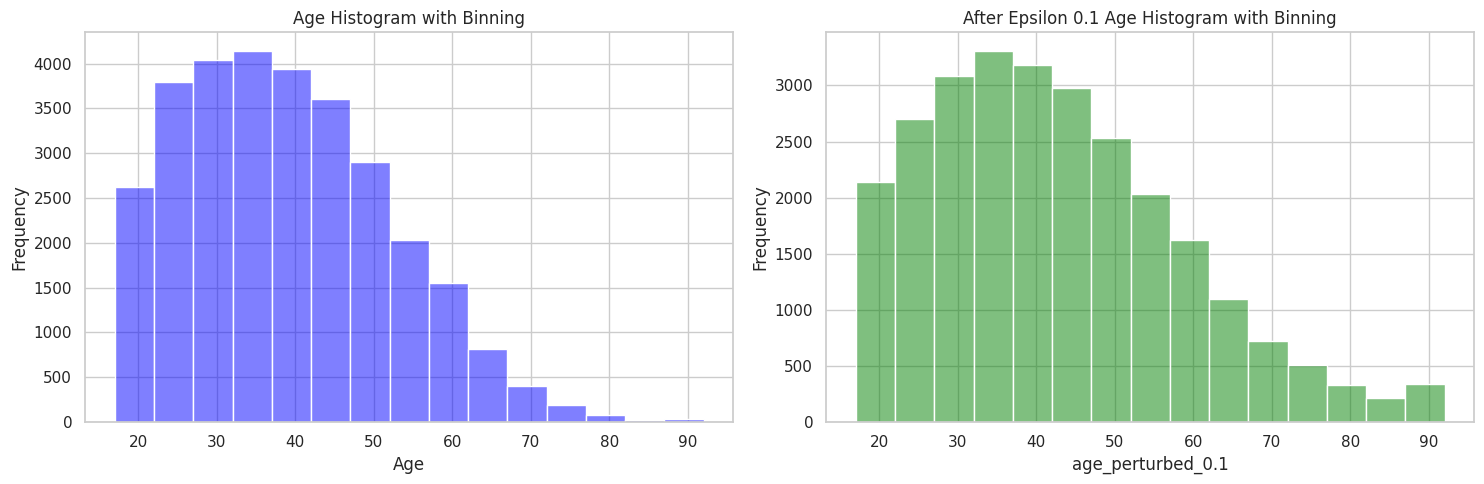

In [ ]:

import seaborn as sns
sns.set(style="whitegrid")

bin_width = 5
bins = range(min(df['age']), max(df['age']) + bin_width, bin_width)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df, x='age', bins=bins, ax=axes[0], color='blue', alpha=0.5)
axes[0].set_title('Age Histogram with Binning')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

selected_column = 'age_perturbed_0.1'
sns.histplot(df, x=selected_column, bins=bins, ax=axes[1], color='green', alpha=0.5)
axes[1].set_title(f'After Epsilon 0.1 Age Histogram with Binning')
axes[1].set_xlabel(selected_column)
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


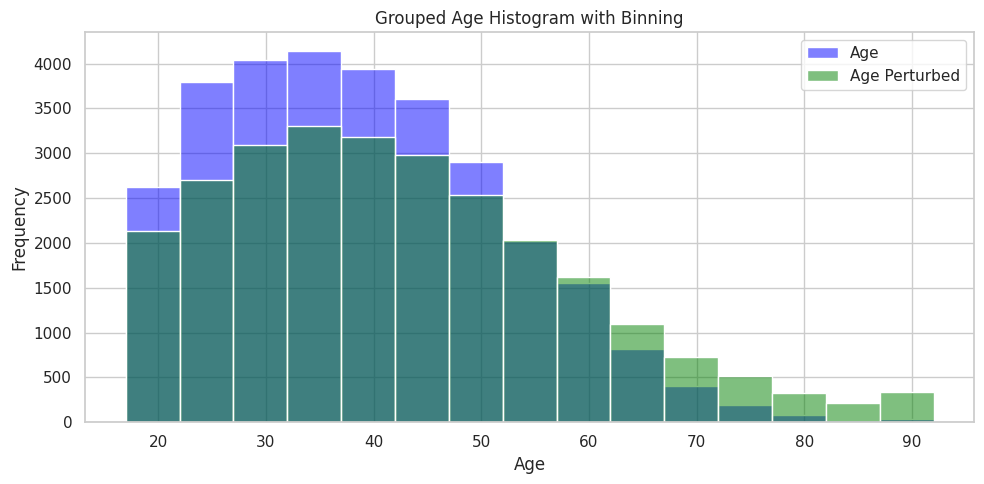

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

bin_width = 5
bins = range(min(df['age']), max(df['age']) + bin_width, bin_width)

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(df, x='age', bins=bins, color='blue', alpha=0.5, label='Age')
sns.histplot(df, x='age_perturbed_0.1', bins=bins, color='green', alpha=0.5, label='Age Perturbed')

ax.set_title('Grouped Age Histogram with Binning')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend()

plt.tight_layout()
plt.show()

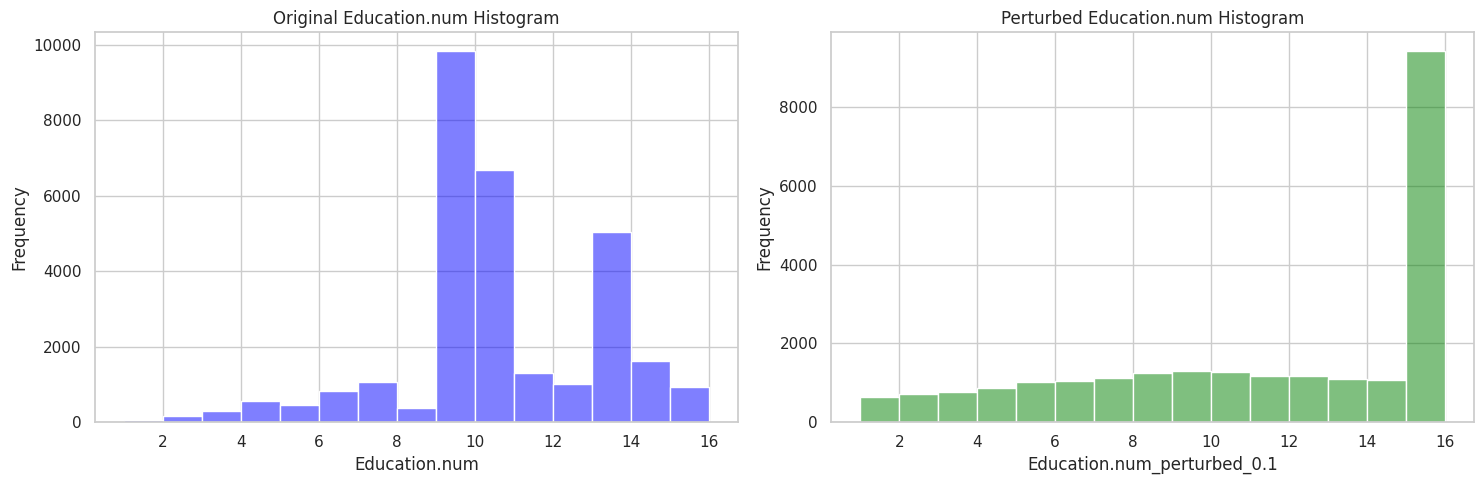

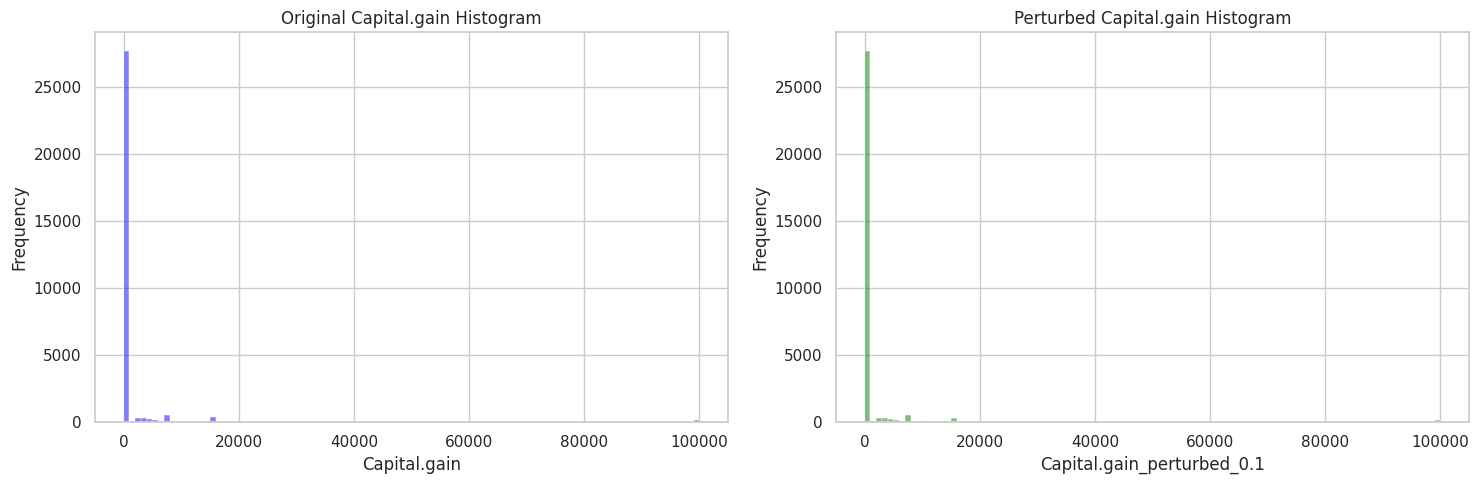

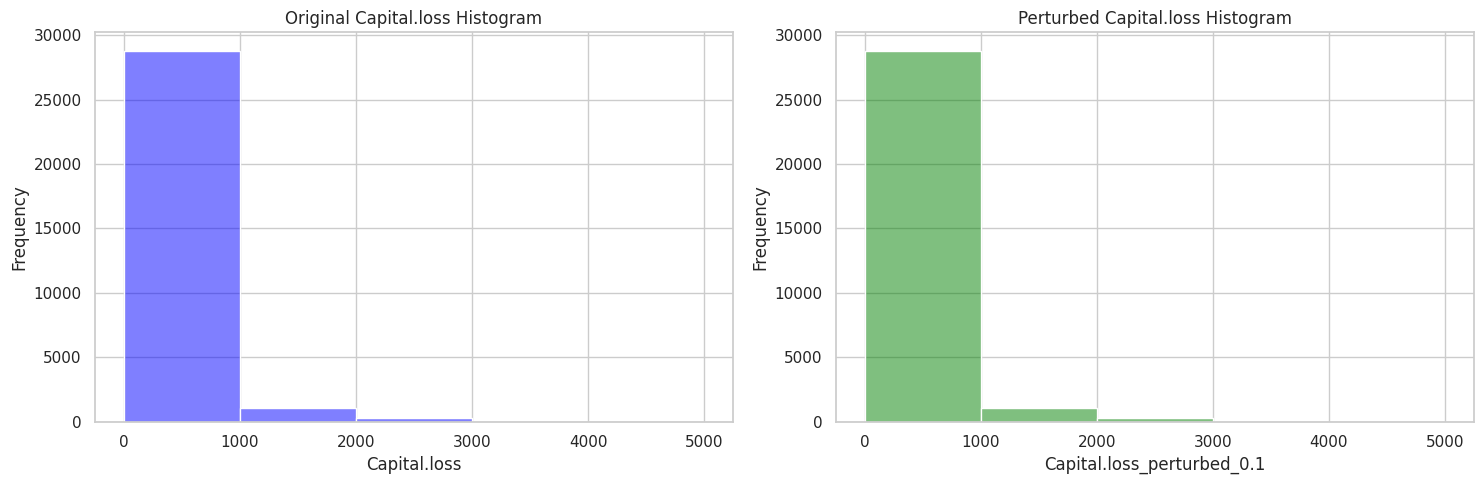

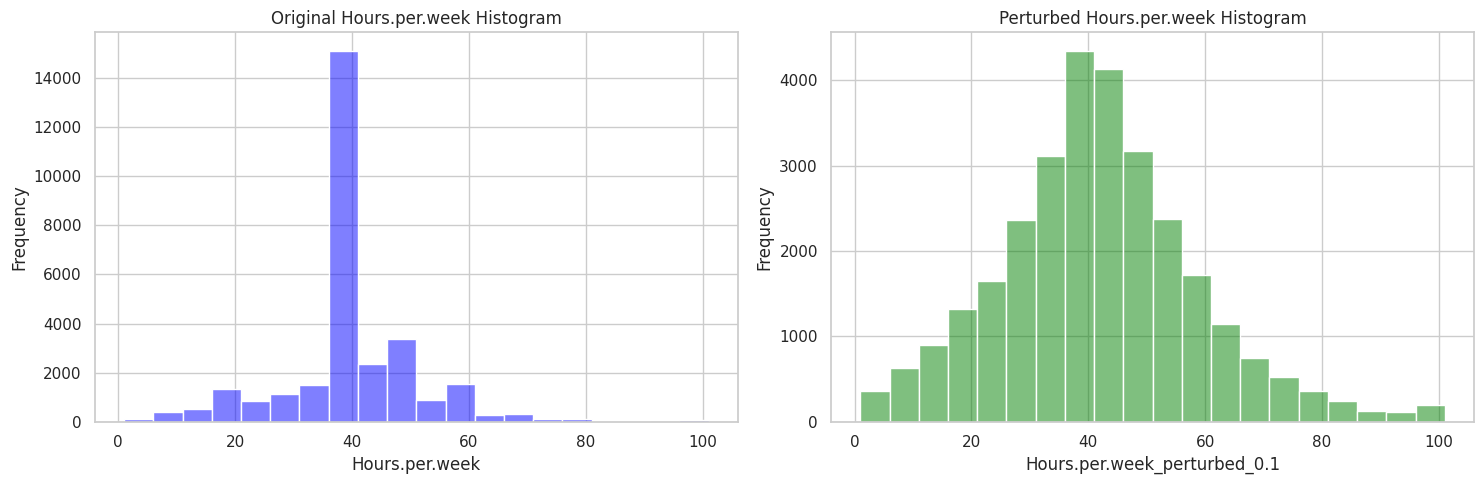

In [ ]:
# 3- visualize the other variables as you did in age, also with a suitable bin width

# 4- We want in one chart we put the value of the original and the perturbed bar chart side by side to better evaluate the utility of the visualization visually. -> In this point what I mean is as you did in the blue and green bar chart, put it in one chart. so the first bin would be blue from age 20 and beside it the green from age 20. etc.
bin_widths = {
    'education.num': 1,
    'capital.gain': 1000,
    'capital.loss': 1000,
    'hours.per.week': 5,
}

for column, bin_width in bin_widths.items():
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    bins = range(int(df[column].min()), int(df[column].max()) + bin_width, bin_width)
    sns.histplot(df, x=column, bins=bins, ax=axes[0], color='blue', alpha=0.5)
    axes[0].set_title(f'Original {column.capitalize()} Histogram')
    axes[0].set_xlabel(column.capitalize())
    axes[0].set_ylabel('Frequency')

    perturbed_column = f'{column}_perturbed_0.1'
    sns.histplot(df, x=perturbed_column, bins=bins, ax=axes[1], color='green', alpha=0.5)
    axes[1].set_title(f'Perturbed {column.capitalize()} Histogram')
    axes[1].set_xlabel(perturbed_column.capitalize())
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


- [ ] We want in one chart we put the value of the original and the perturbed bar chart side by side to better evaluate the utility of the visualization visually.

- capital.gain Plots

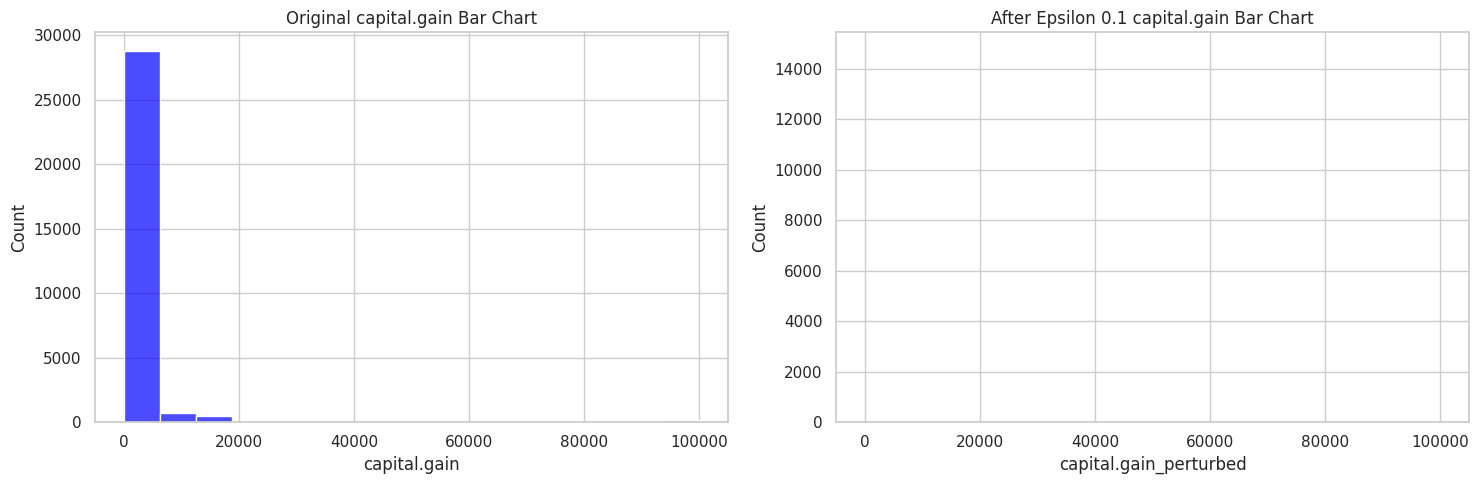

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'capital.gain'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.1', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.1 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- capital.loss Plots

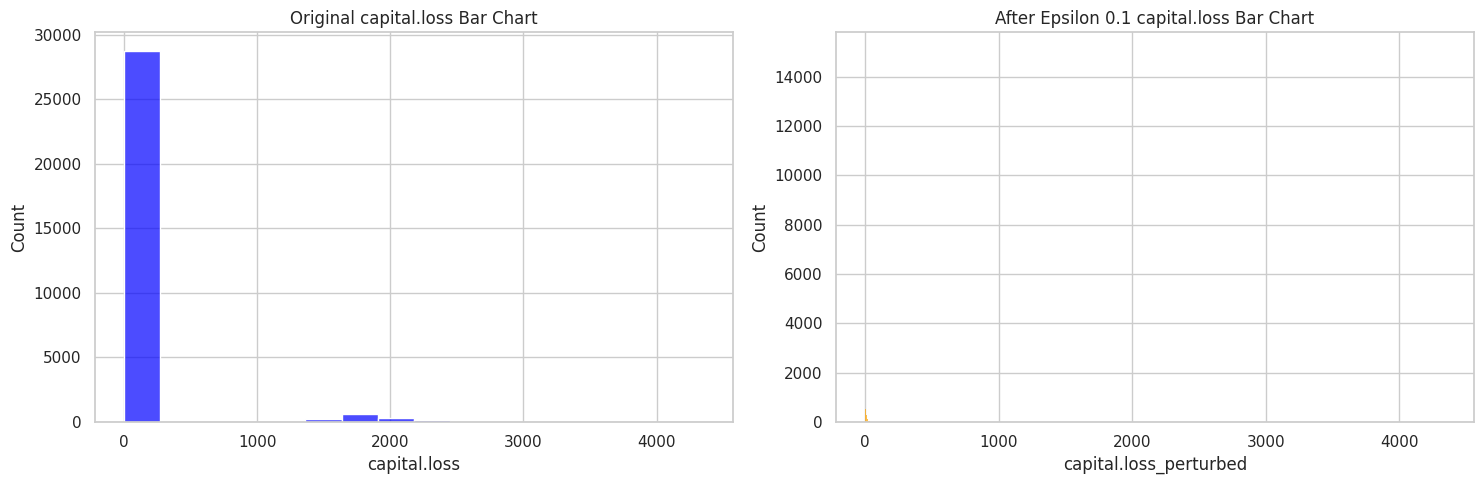

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'capital.loss'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.1', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.1 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- hours.per.week Plots

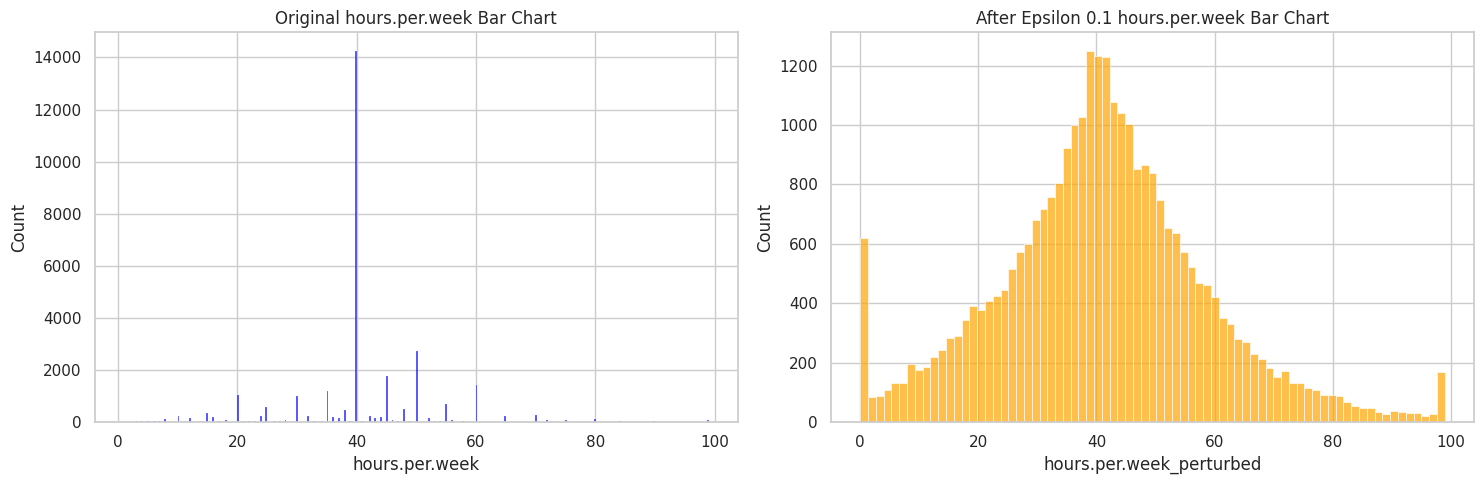

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'hours.per.week'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.1', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.1 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- age Plots

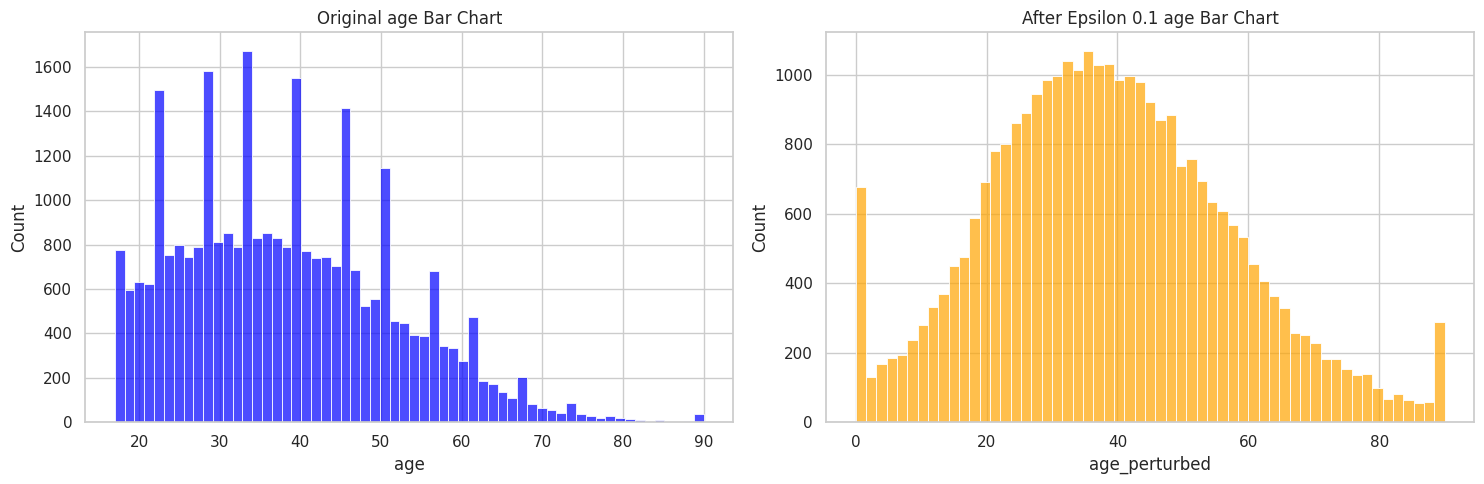

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'age'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.1', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.1 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- education.num Plots

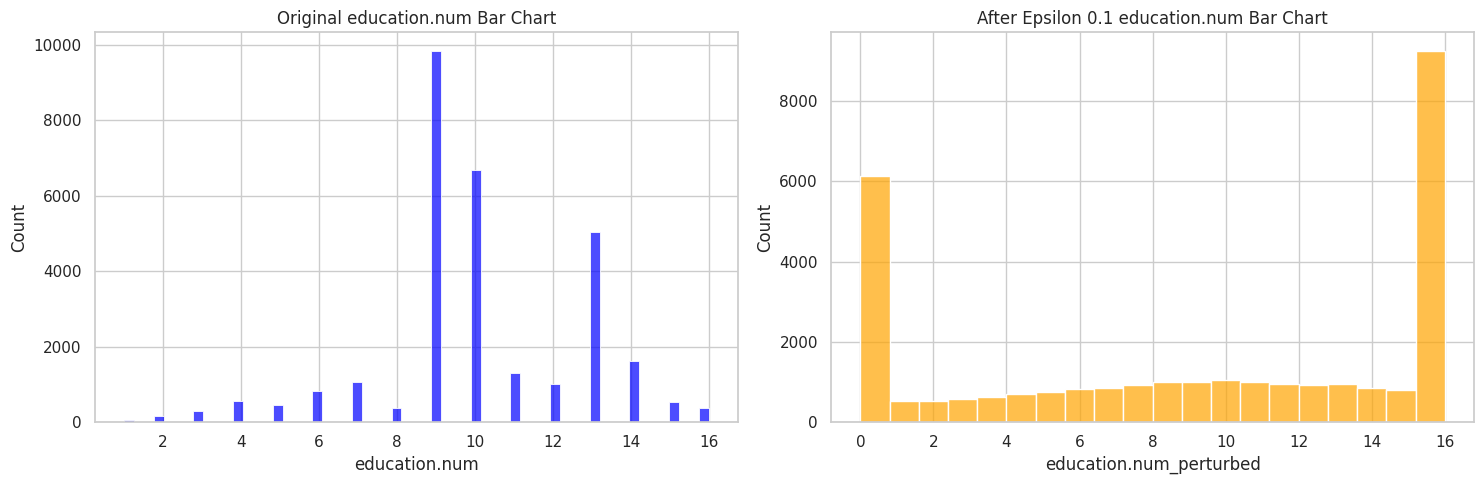

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'education.num'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.1', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.1 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

- [ ] we want to add one chart that has the average income variable on the y-axis and  “education or education num” on the x-axis.

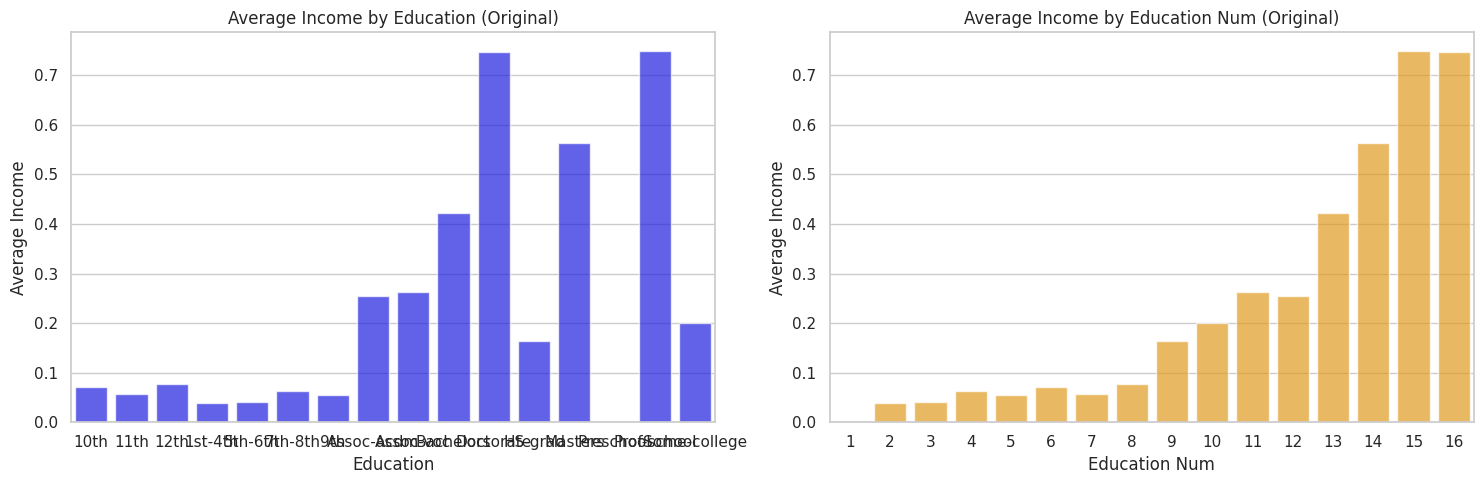

In [ ]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

avg_income_education = df.groupby('education')['income'].mean().reset_index()
sns.barplot(data=avg_income_education, x='education', y='income', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Average Income by Education (Original)')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Average Income')

avg_income_education_num = df.groupby('education.num')['income'].mean().reset_index()
sns.barplot(data=avg_income_education_num, x='education.num', y='income', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title('Average Income by Education Num (Original)')
axes[1].set_xlabel('Education Num')
axes[1].set_ylabel('Average Income')

plt.tight_layout()
plt.show()


2- it would be better if we put the age, the age after 0.1 epsilon, the age after 0.5 and 1 by side as you did before, and this should be for all of the rest variables to make it better for comparison.

**Epsilon 0.5**

In [ ]:
# Load your dataframe
df = pd.read_excel('adult_withoutnull.xlsx')
def add_laplace_noise(data, epsilon, sensitivity):
    noise = np.random.laplace(0, sensitivity / epsilon, size=data.shape)
    return data + noise

sensitivity_numerical = 1
epsilon_numerical = 0.5

numerical_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week','age']
perturbed_columns = []
for column in numerical_columns:
    perturbed_column = f"{column}_perturbed_0.5"
    df[perturbed_column] = add_laplace_noise(df[column], epsilon_numerical, sensitivity_numerical)
    perturbed_columns.append(perturbed_column)

In [ ]:
# Apply Laplace noise to 'education'
sensitivity_categorical = 1
epsilon_categorical = 0.5

education_counts = df['education'].value_counts()
noise = np.random.laplace(0, sensitivity_categorical / epsilon_categorical, size=len(education_counts))
noisy_counts = education_counts + noise
df['education_perturbed_0.5'] = df['education'].map(noisy_counts)
df['education_perturbed_0.5'] = df['education_perturbed_0.5'].clip(lower=0)

In [ ]:
numerical_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']
non_negative_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']

for column in numerical_columns:
    min_value = 0 if column in non_negative_columns else df[column].min()
    max_value = df[column].max()
    df[column] = df[column].clip(lower=min_value, upper=max_value)

perturbed_columns = numerical_columns
print("Perturbed Columns:")
print(df[perturbed_columns].head())

Perturbed Columns:
   education.num  capital.gain  capital.loss  hours.per.week  age
0              9             0          4356              18   82
1              4             0          3900              40   54
2             10             0          3900              40   41
3              9             0          3770              45   34
4              6             0          3770              40   38


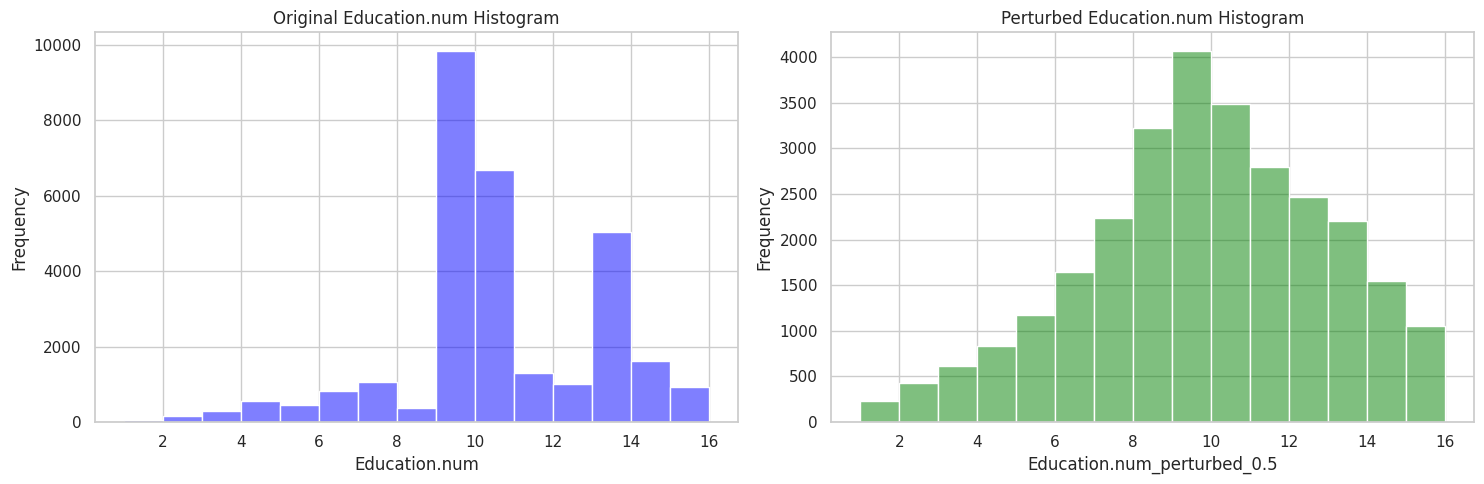

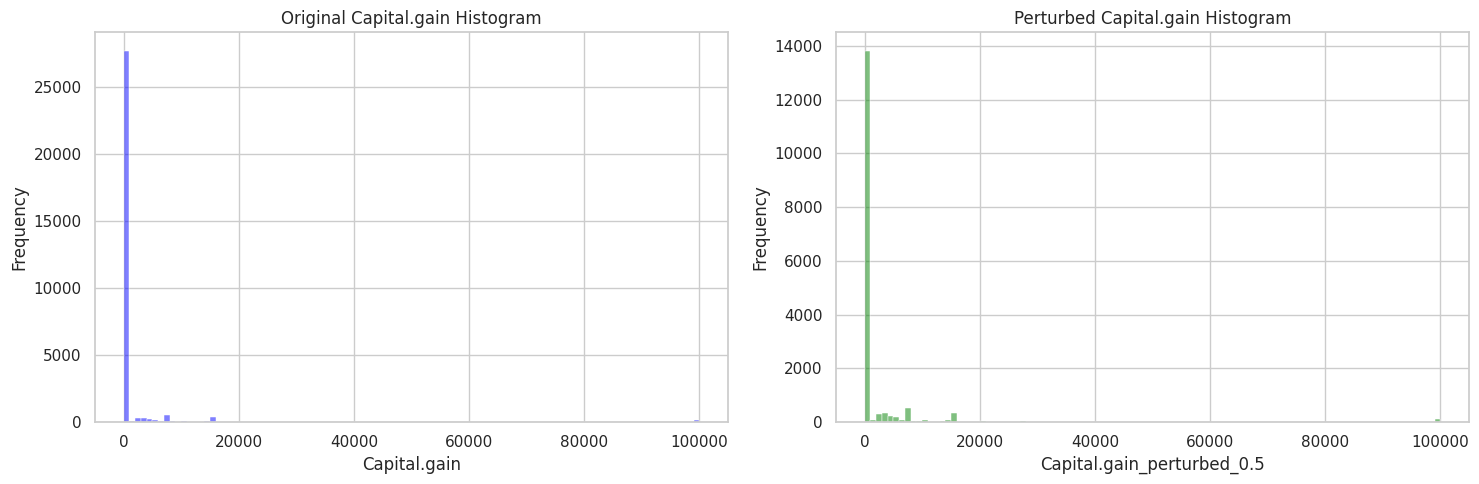

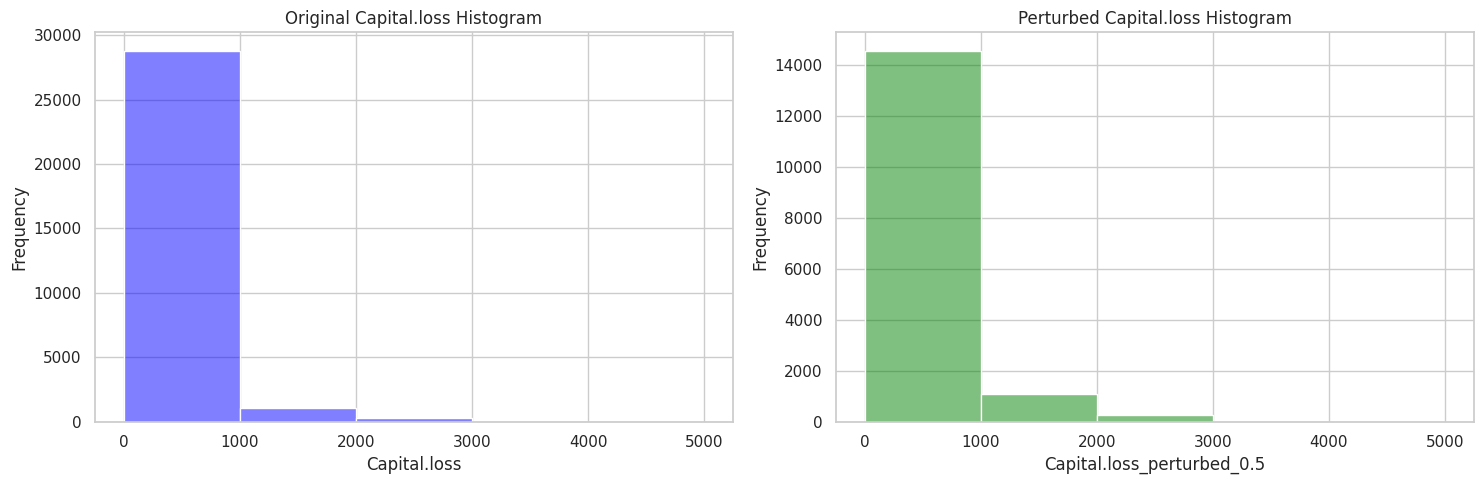

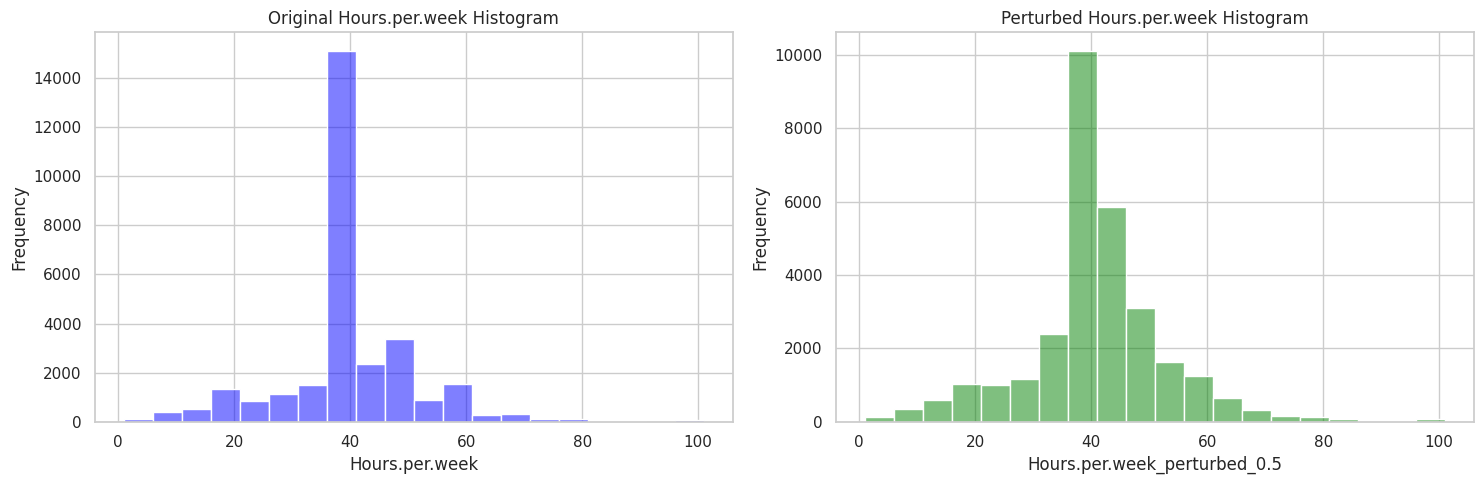

In [ ]:
bin_widths = {
    'education.num': 1,
    'capital.gain': 1000,
    'capital.loss': 1000,
    'hours.per.week': 5,
}

for column, bin_width in bin_widths.items():
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    bins = range(int(df[column].min()), int(df[column].max()) + bin_width, bin_width)
    sns.histplot(df, x=column, bins=bins, ax=axes[0], color='blue', alpha=0.5)
    axes[0].set_title(f'Original {column.capitalize()} Histogram')
    axes[0].set_xlabel(column.capitalize())
    axes[0].set_ylabel('Frequency')

    perturbed_column = f'{column}_perturbed_0.5'
    sns.histplot(df, x=perturbed_column, bins=bins, ax=axes[1], color='green', alpha=0.5)
    axes[1].set_title(f'Perturbed {column.capitalize()} Histogram')
    axes[1].set_xlabel(perturbed_column.capitalize())
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


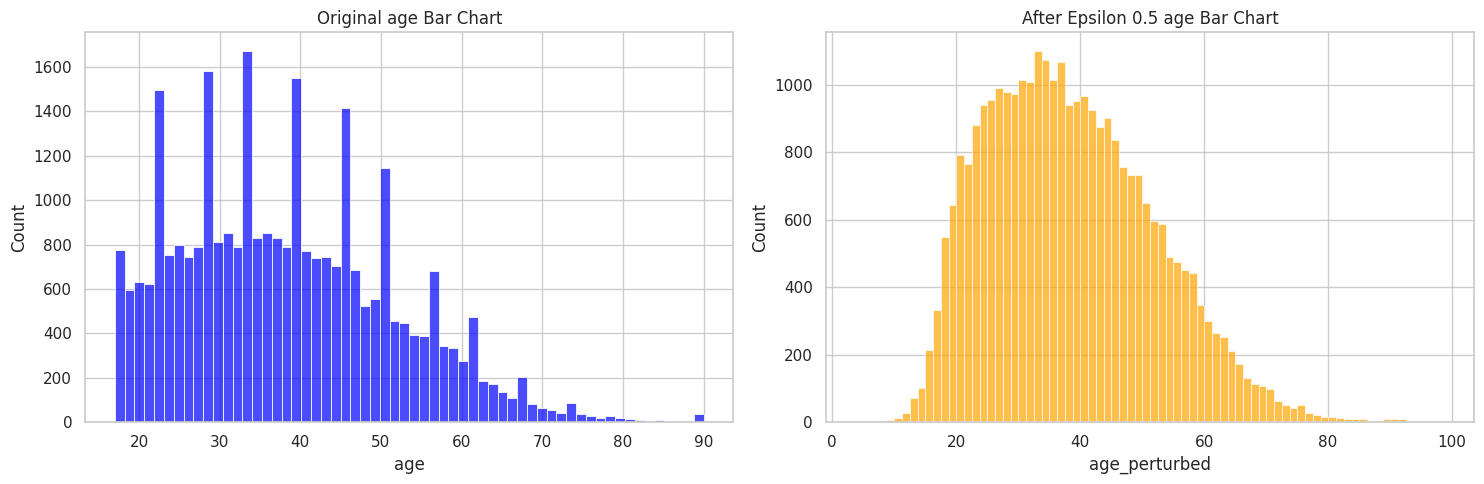

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'age'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.5', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.5 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

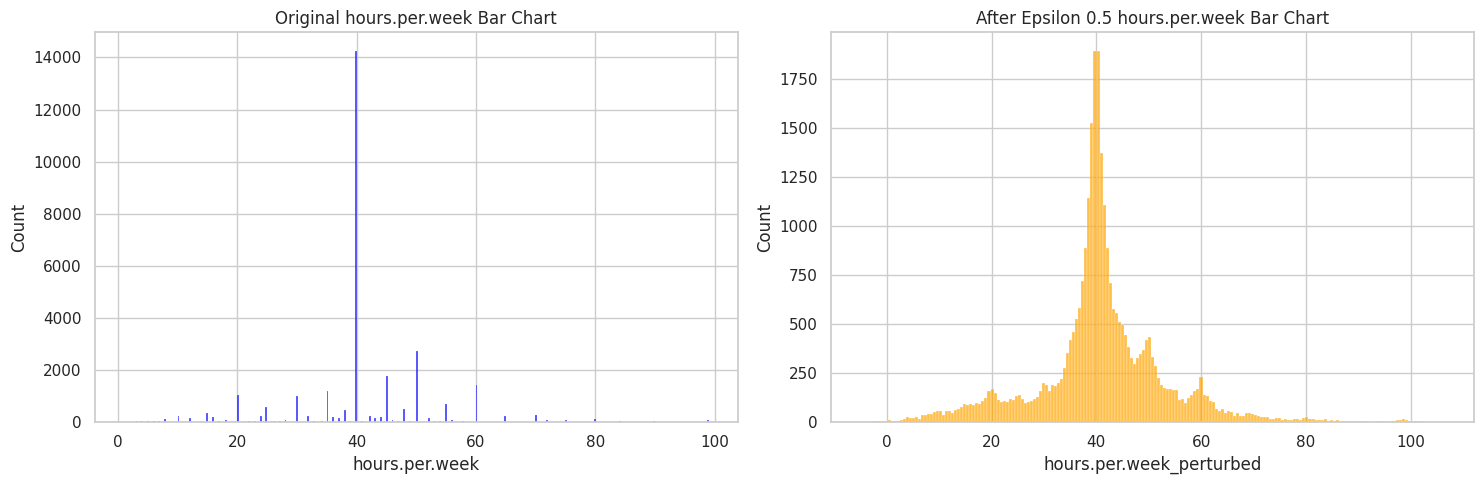

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'hours.per.week'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.5', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.5 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

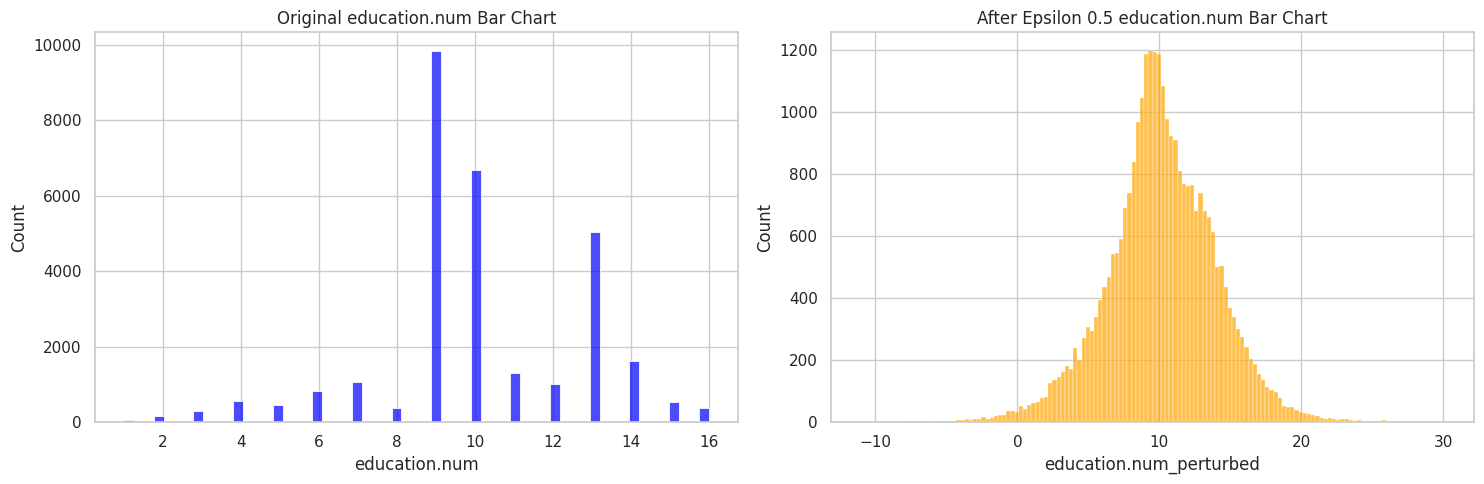

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'education.num'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.5', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.5 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

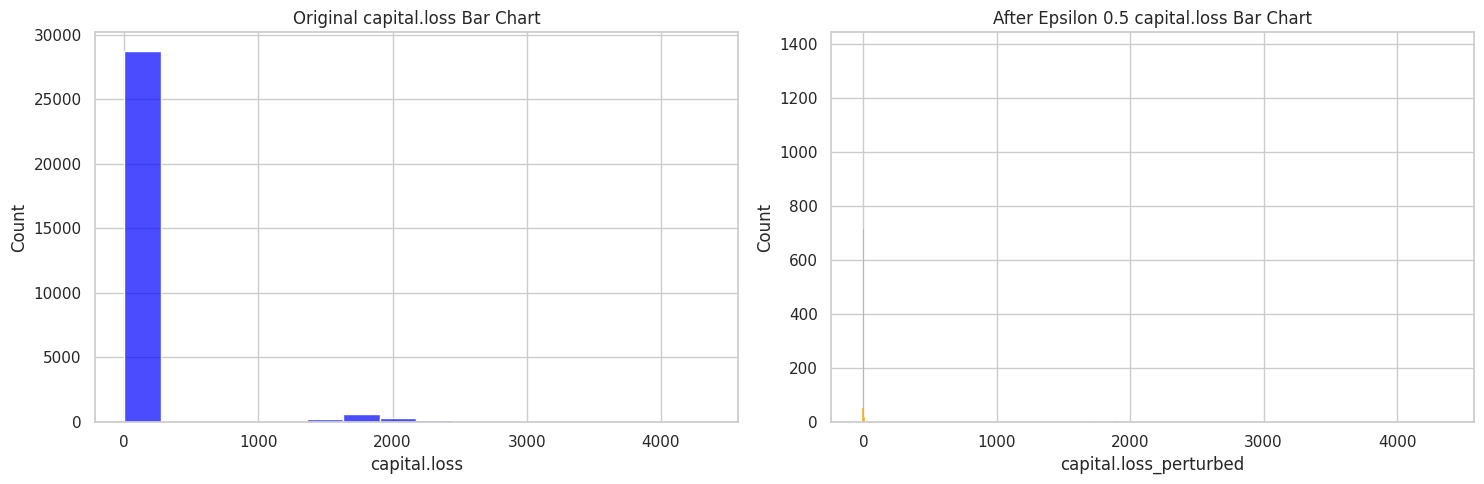

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'capital.loss'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.5', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.5 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

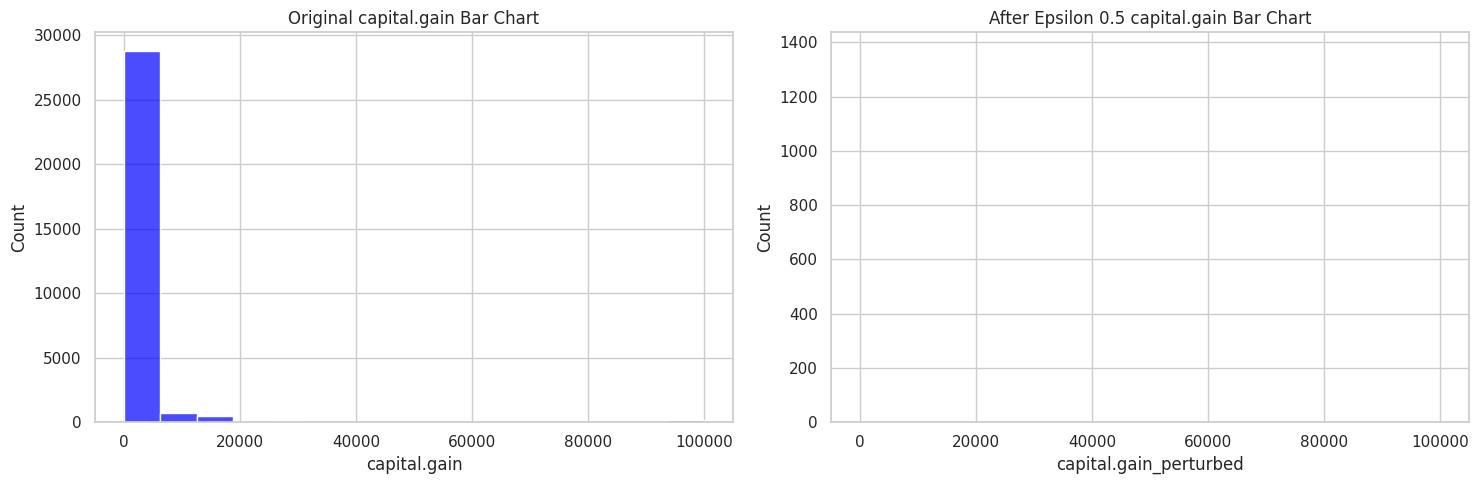

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'capital.gain'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_0.5', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 0.5 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

**Epsilon 1.0**

In [ ]:
# Load your dataframe
df = pd.read_excel('adult_withoutnull.xlsx')
def add_laplace_noise(data, epsilon, sensitivity):
    noise = np.random.laplace(0, sensitivity / epsilon, size=data.shape)
    return data + noise

sensitivity_numerical = 1
epsilon_numerical = 1.0

numerical_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week','age']
perturbed_columns = []
for column in numerical_columns:
    perturbed_column = f"{column}_perturbed_1.0"
    df[perturbed_column] = add_laplace_noise(df[column], epsilon_numerical, sensitivity_numerical)
    perturbed_columns.append(perturbed_column)

In [ ]:
# Apply Laplace noise to 'education'
sensitivity_categorical = 1
epsilon_categorical = 1.0

education_counts = df['education'].value_counts()
noise = np.random.laplace(0, sensitivity_categorical / epsilon_categorical, size=len(education_counts))
noisy_counts = education_counts + noise
df['education_perturbed_1.0'] = df['education'].map(noisy_counts)
df['education_perturbed_1.0'] = df['education_perturbed_1.0'].clip(lower=0)

In [ ]:
numerical_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']
non_negative_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']

for column in numerical_columns:
    min_value = 0 if column in non_negative_columns else df[column].min()
    max_value = df[column].max()
    df[column] = df[column].clip(lower=min_value, upper=max_value)

perturbed_columns = numerical_columns
print("Perturbed Columns:")
print(df[perturbed_columns].head())

Perturbed Columns:
   education.num  capital.gain  capital.loss  hours.per.week  age
0              9             0          4356              18   82
1              4             0          3900              40   54
2             10             0          3900              40   41
3              9             0          3770              45   34
4              6             0          3770              40   38


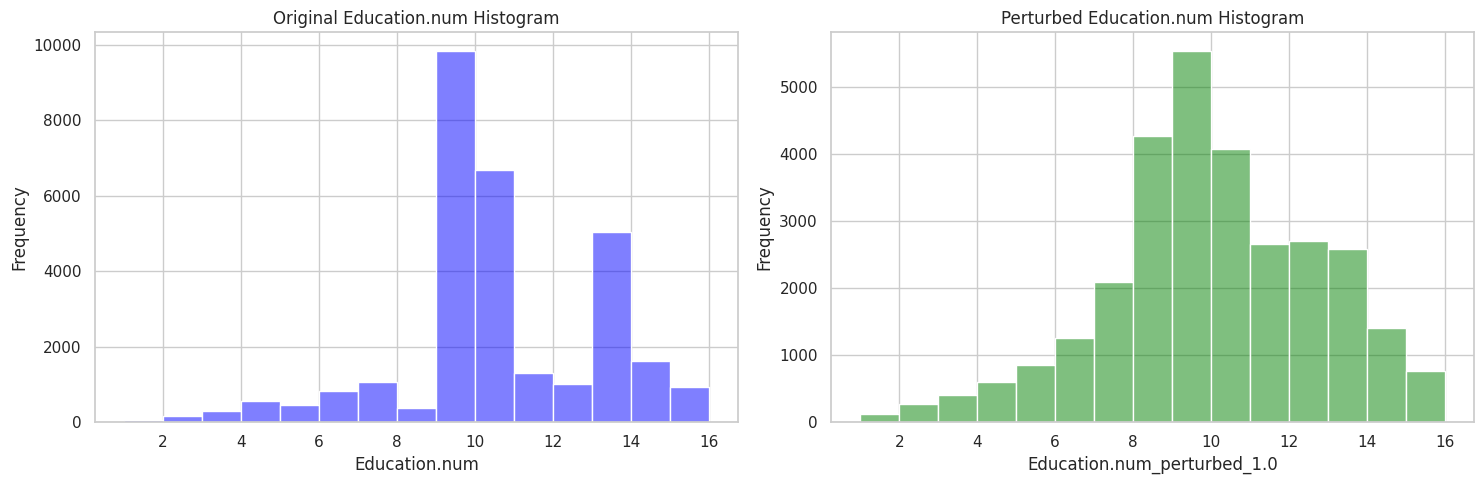

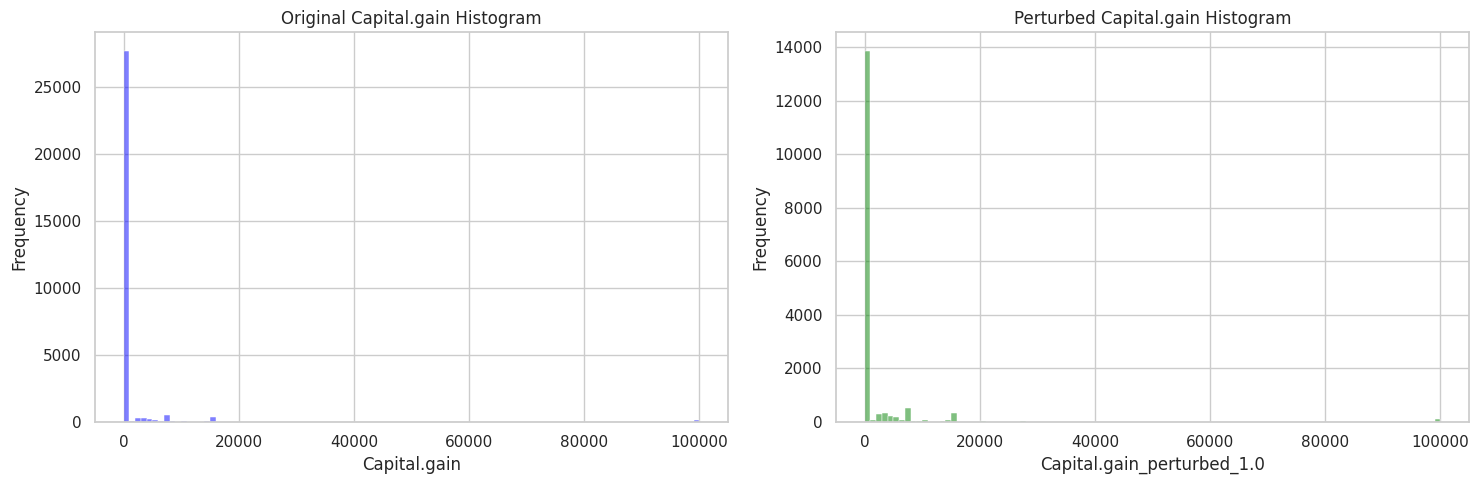

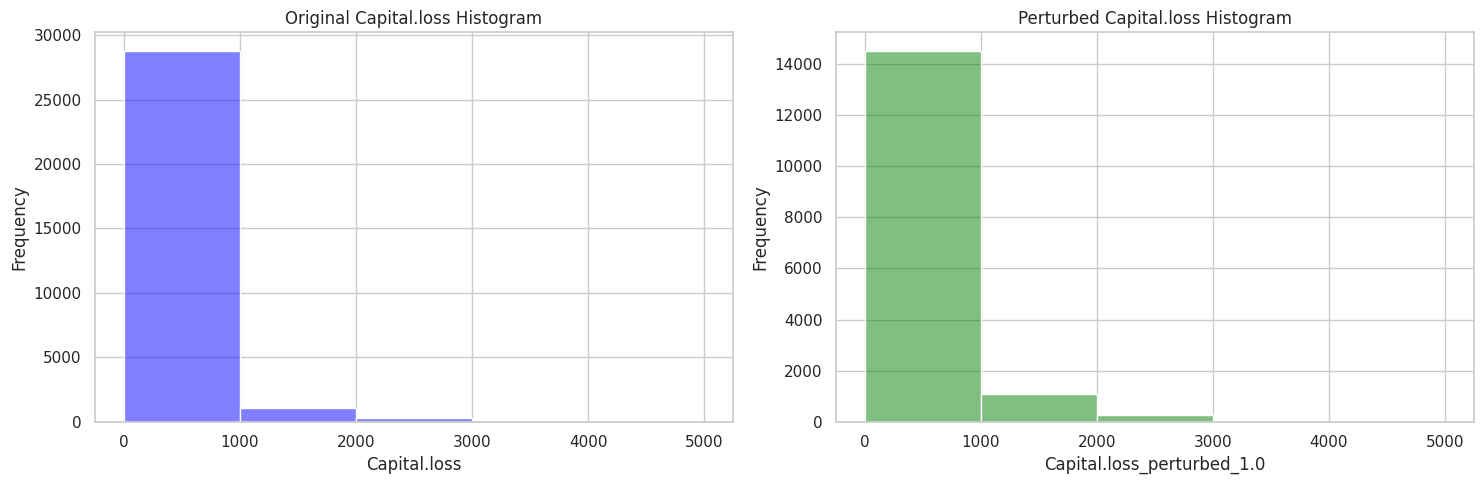

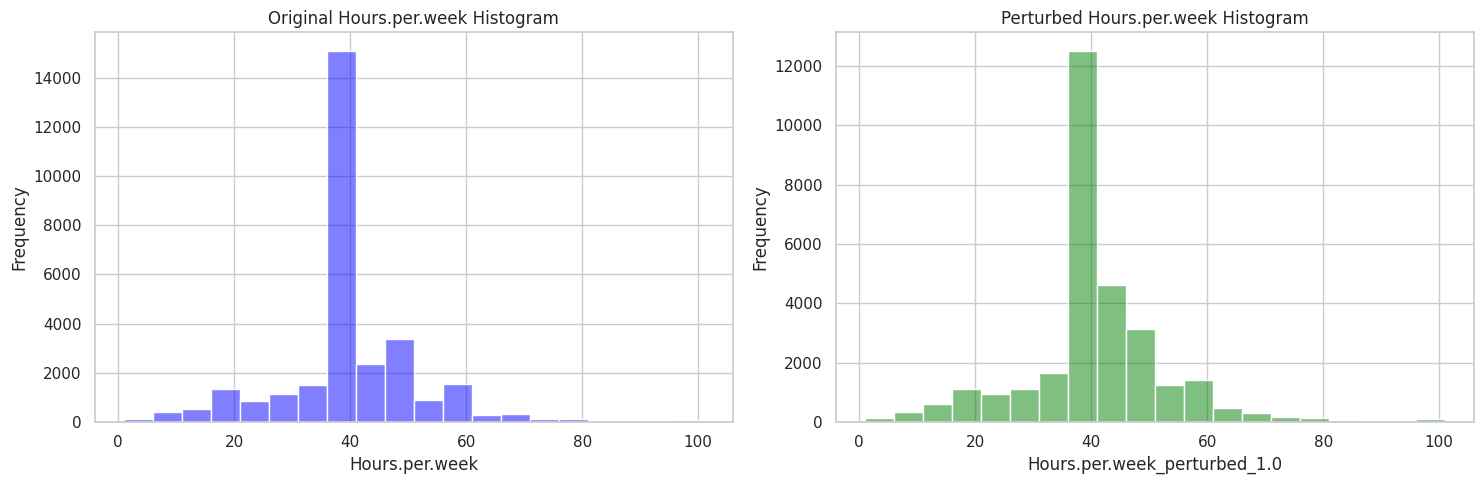

In [ ]:
bin_widths = {
    'education.num': 1,
    'capital.gain': 1000,
    'capital.loss': 1000,
    'hours.per.week': 5,
}

for column, bin_width in bin_widths.items():
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    bins = range(int(df[column].min()), int(df[column].max()) + bin_width, bin_width)
    sns.histplot(df, x=column, bins=bins, ax=axes[0], color='blue', alpha=0.5)
    axes[0].set_title(f'Original {column.capitalize()} Histogram')
    axes[0].set_xlabel(column.capitalize())
    axes[0].set_ylabel('Frequency')

    perturbed_column = f'{column}_perturbed_1.0'
    sns.histplot(df, x=perturbed_column, bins=bins, ax=axes[1], color='green', alpha=0.5)
    axes[1].set_title(f'Perturbed {column.capitalize()} Histogram')
    axes[1].set_xlabel(perturbed_column.capitalize())
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


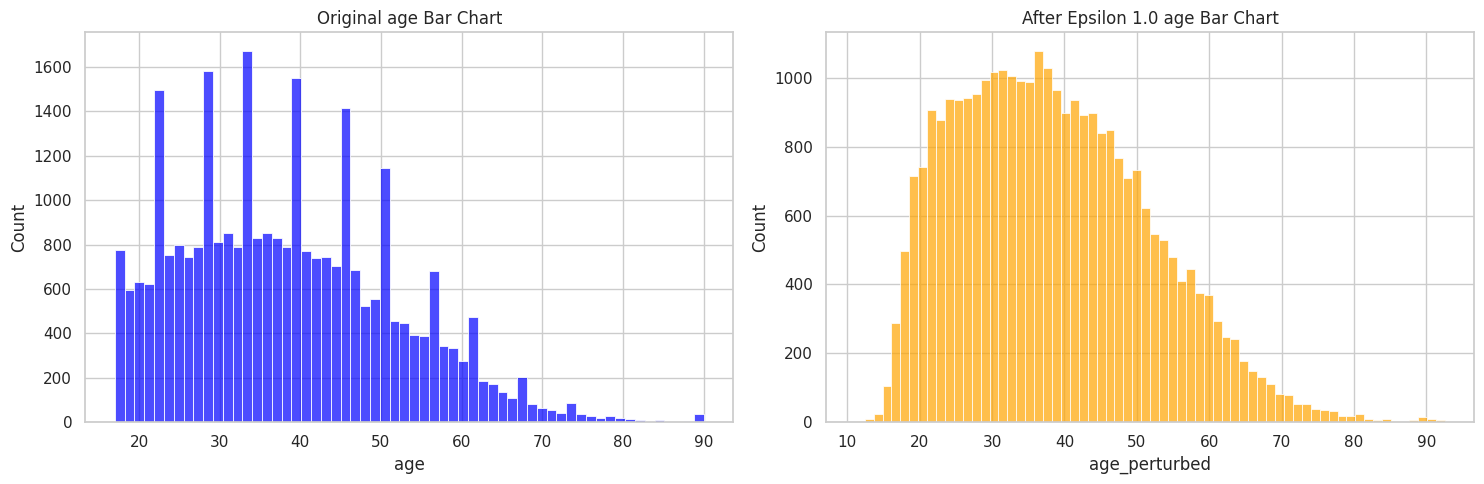

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'age'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_1.0', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 1.0 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

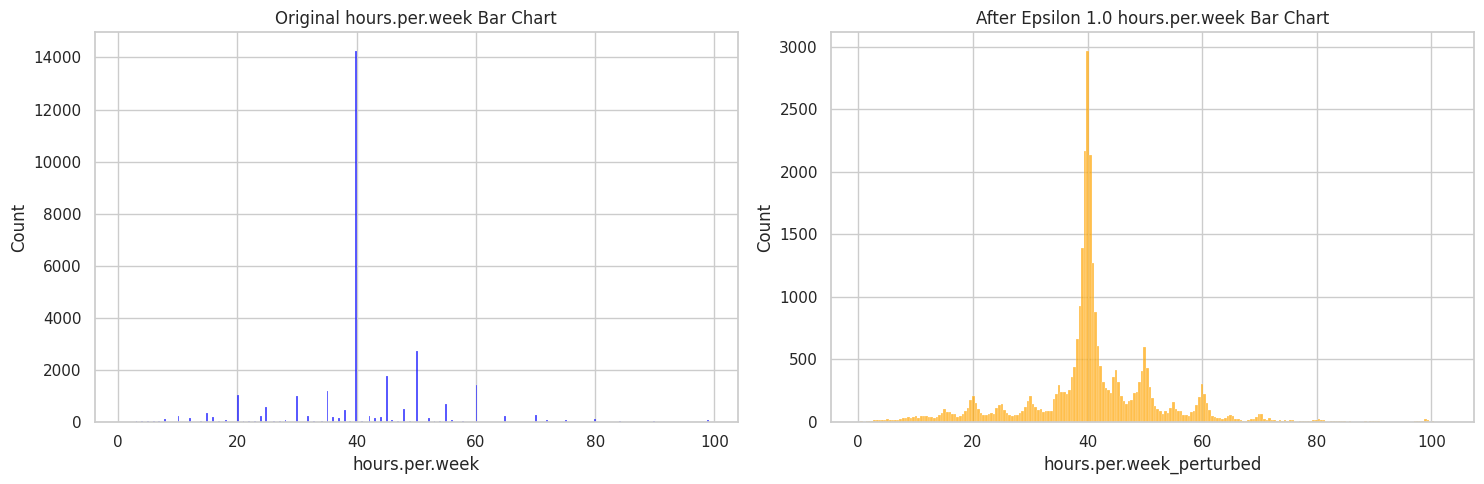

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'hours.per.week'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_1.0', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 1.0 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

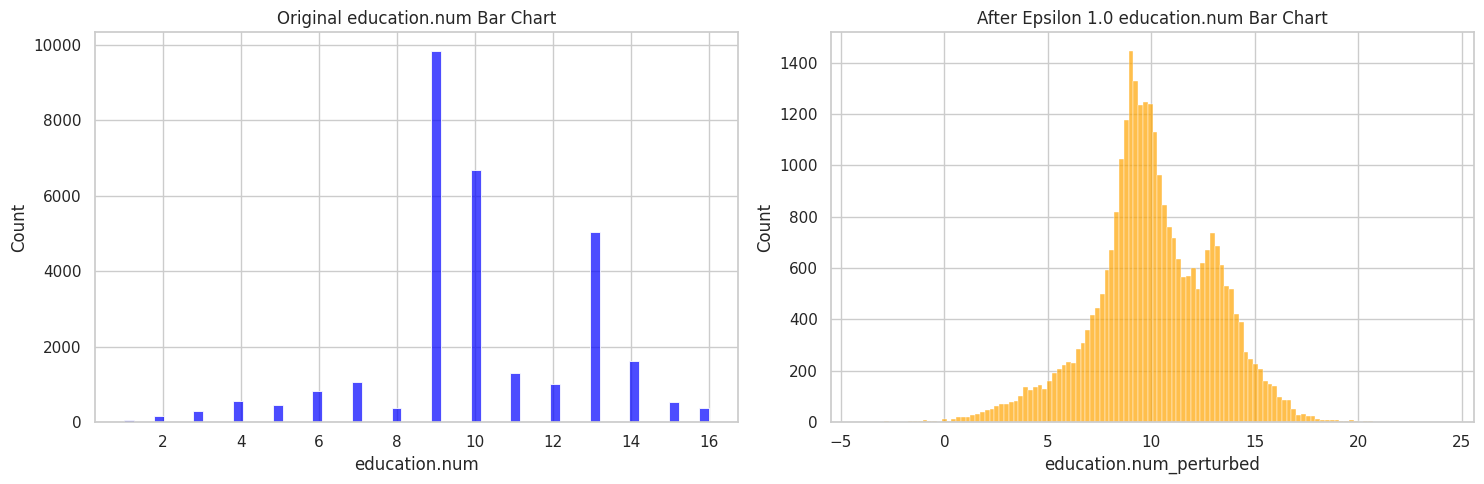

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'education.num'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_1.0', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 1.0 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

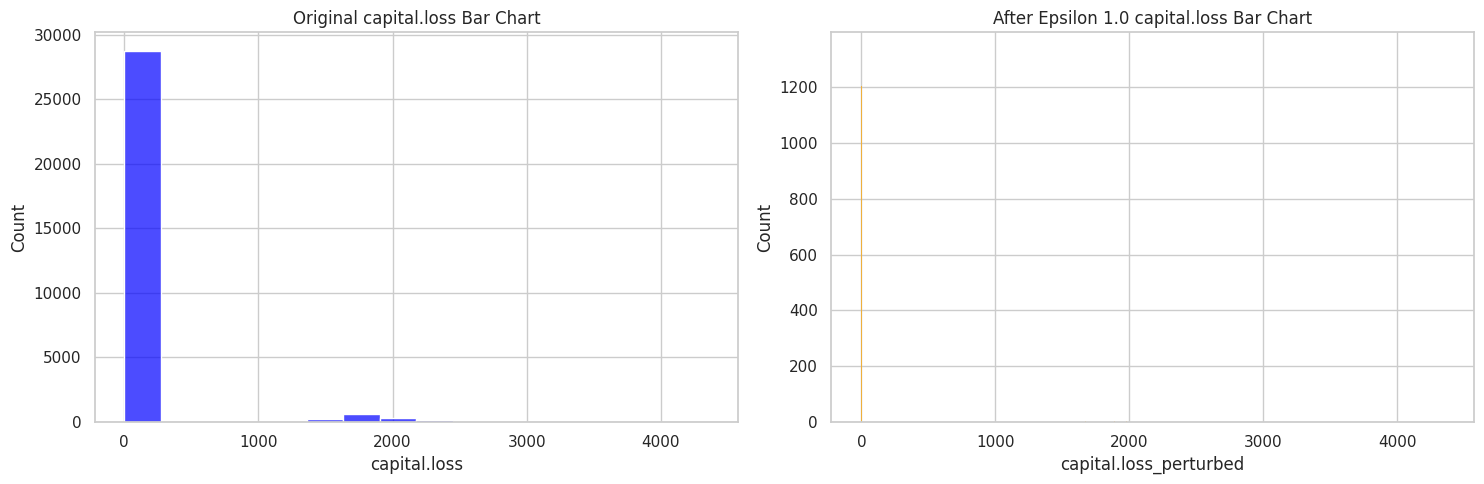

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
selected_column = 'capital.loss'

sns.histplot(data=df, x=selected_column, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title(f'Original {selected_column} Bar Chart')
axes[0].set_xlabel(selected_column)
axes[0].set_ylabel('Count')

sns.histplot(data=df, x=f'{selected_column}_perturbed_1.0', ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title(f'After Epsilon 1.0 {selected_column} Bar Chart')
axes[1].set_xlabel(f'{selected_column}_perturbed')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [2]:
df = pd.read_excel('adult_withoutnull.xlsx')

def add_laplace_noise(data, epsilon, sensitivity):
    """Adds Laplace noise to data."""
    noise = np.random.laplace(0, sensitivity / epsilon, size=data.shape)
    return data + noise

epsilon_values = [0.1, 0.5, 1.0]
sensitivity_numerical = 1

numerical_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']
non_negative_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']

for epsilon in epsilon_values:
    for column in numerical_columns:
        perturbed_column = f"{column}_perturbed_{epsilon}"
        df[perturbed_column] = add_laplace_noise(df[column], epsilon, sensitivity_numerical)

        min_value = 0 if column in non_negative_columns else df[column].min()
        max_value = df[column].max()

        df[perturbed_column] = df[perturbed_column].clip(lower=min_value, upper=max_value)

perturbed_columns = [f"{col}_perturbed_{epsilon}" for col in numerical_columns for epsilon in epsilon_values]


NameError: name 'pd' is not defined

In [ ]:
from tabulate import tabulate
selected_columns = ['age', 'age_perturbed_0.1', 'age_perturbed_0.5', 'age_perturbed_1.0']
table_data = df[selected_columns].head(10)

print(tabulate(table_data, headers='keys', tablefmt='pretty', showindex="never"))

+------+--------------------+--------------------+--------------------+
| age  | age_perturbed_0.1  | age_perturbed_0.5  | age_perturbed_1.0  |
+------+--------------------+--------------------+--------------------+
| 82.0 | 70.11384710392551  | 83.66829164884916  |  83.2138957469471  |
| 54.0 | 64.16022310047984  |  58.6335504917484  | 50.514190444362804 |
| 41.0 | 45.52912622193901  | 41.861983847093676 | 40.39184906176377  |
| 34.0 | 32.273560980136274 | 33.892416023814036 |  33.0563210781524  |
| 38.0 | 47.68715749054087  | 37.33930469038427  | 39.121648213579775 |
| 74.0 | 89.93435097387666  | 74.53612235306404  |  71.8739853116493  |
| 68.0 | 70.34271487237355  | 70.26813875248675  | 68.45848075904888  |
| 45.0 | 41.77298582973217  | 44.090954252162774 |  44.5539950895502  |
| 38.0 | 54.50226362979022  |  41.4497045053472  | 38.389988631127416 |
| 52.0 | 56.923814586352485 | 52.159360728701884 | 52.88927437690558  |
+------+--------------------+--------------------+--------------

In [ ]:
selected_columns = ['education.num', 'education.num_perturbed_0.1', 'education.num_perturbed_0.5', 'education.num_perturbed_1.0']
table_data = df[selected_columns].head(10)
print(tabulate(table_data, headers='keys', tablefmt='pretty', showindex="never"))

+---------------+-----------------------------+-----------------------------+-----------------------------+
| education.num | education.num_perturbed_0.1 | education.num_perturbed_0.5 | education.num_perturbed_1.0 |
+---------------+-----------------------------+-----------------------------+-----------------------------+
|      9.0      |             0.0             |     14.098115981988855      |      9.49527921986294       |
|      4.0      |             0.0             |      5.02009742435762       |     3.4256738494226946      |
|     10.0      |      6.504192600199197      |      9.627422623879845      |      11.18856602903205      |
|      9.0      |     2.0797212752799297      |     11.033350255221041      |      8.162979316709508      |
|      6.0      |     13.052817596555574      |      5.190861622385269      |      7.011460929536729      |
|     16.0      |      12.49891080285105      |     12.134515588421749      |     15.049617940679877      |
|      9.0      |     11.907

In [ ]:
selected_columns = ['capital.gain', 'capital.gain_perturbed_0.1', 'capital.gain_perturbed_0.5', 'capital.gain_perturbed_1.0']
table_data = df[selected_columns].head(10)
print(tabulate(table_data, headers='keys', tablefmt='pretty', showindex="never"))

+--------------+----------------------------+----------------------------+----------------------------+
| capital.gain | capital.gain_perturbed_0.1 | capital.gain_perturbed_0.5 | capital.gain_perturbed_1.0 |
+--------------+----------------------------+----------------------------+----------------------------+
|     0.0      |            0.0             |            0.0             |            0.0             |
|     0.0      |            0.0             |            0.0             |            0.0             |
|     0.0      |     5.891181477272268      |            0.0             |            0.0             |
|     0.0      |    0.10600818340359587     |            0.0             |            0.0             |
|     0.0      |      16.0928998808366      |     2.149313148551261      |            0.0             |
|     0.0      |            0.0             |     1.1636826429611127     |     0.1876808620524061     |
|     0.0      |            0.0             |     1.942403942265

In [ ]:
selected_columns = ['capital.loss', 'capital.loss_perturbed_0.1', 'capital.loss_perturbed_0.5', 'capital.loss_perturbed_1.0']
table_data = df[selected_columns].head(10)
print(tabulate(table_data, headers='keys', tablefmt='pretty', showindex="never"))

+--------------+----------------------------+----------------------------+----------------------------+
| capital.loss | capital.loss_perturbed_0.1 | capital.loss_perturbed_0.5 | capital.loss_perturbed_1.0 |
+--------------+----------------------------+----------------------------+----------------------------+
|    4356.0    |           4356.0           |     4354.795918507244      |     4355.843561521293      |
|    3900.0    |     3911.0150471752113     |     3901.992535785314      |     3900.8324653084846     |
|    3900.0    |     3893.379376009266      |     3900.129333074898      |     3898.914779842498      |
|    3770.0    |     3755.2895889513898     |     3766.558594177186      |      3769.39579133027      |
|    3770.0    |     3777.7025747904036     |     3772.296785015342      |     3769.104031482419      |
|    3683.0    |     3684.6962682722224     |     3683.275669598627      |     3683.454199984655      |
|    3683.0    |     3687.963019981861      |     3683.675886105

In [ ]:
selected_columns = ['hours.per.week', 'hours.per.week_perturbed_0.1', 'hours.per.week_perturbed_0.5', 'hours.per.week_perturbed_1.0']
table_data = df[selected_columns].head(10)
print(tabulate(table_data, headers='keys', tablefmt='pretty', showindex="never"))

+----------------+------------------------------+------------------------------+------------------------------+
| hours.per.week | hours.per.week_perturbed_0.1 | hours.per.week_perturbed_0.5 | hours.per.week_perturbed_1.0 |
+----------------+------------------------------+------------------------------+------------------------------+
|      18.0      |      8.879405291002108       |      17.627792413638552      |      16.930327384408237      |
|      40.0      |      45.41007940105286       |      39.502846971547235      |      41.75308833989347       |
|      40.0      |       44.3352423331853       |      35.62169486989429       |      40.078576192571894      |
|      45.0      |      26.888261585032076      |      49.20680223343123       |      44.758207297052515      |
|      40.0      |      32.83192092151762       |      39.714044761082384      |      40.93756386604626       |
|      20.0      |      31.899404540598567      |      19.726075724275734      |      21.61859759164882 

**Evaluation Part**

In [12]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# load data
df = pd.read_excel('adult_withoutnull.xlsx')

In [13]:
def add_laplace_noise(data, epsilon, sensitivity):
    """Adds Laplace noise to data."""
    noise = np.random.laplace(0, sensitivity / epsilon, size=data.shape)
    return data + noise

In [14]:
def calculate_rmse(original_data, perturbed_data):
    return np.sqrt(np.mean((original_data - perturbed_data)**2))

In [15]:
# all static variables
numerical_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']
non_negative_columns = ['education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'age']

epsilon_values = [0.1, 0.5, 1.0]
original_df = df.copy()
sensitivity_numerical = 1
results = []

In [16]:
for epsilon in epsilon_values:
    epsilon_results = {"Epsilon": epsilon}
    for column in numerical_columns:
        perturbed_column = f"{column}_perturbed_{epsilon}"
        df[perturbed_column] = add_laplace_noise(df[column], epsilon, sensitivity_numerical)

        min_value = 0 if column in non_negative_columns else df[column].min()
        max_value = df[column].max()

        df[perturbed_column] = df[perturbed_column].clip(lower=min_value, upper=max_value)

        rmse_score = calculate_rmse(original_df[column], df[perturbed_column])
        epsilon_results[column] = rmse_score

    results.append(epsilon_results)

In [17]:
# Display Results
table = tabulate(results, headers="keys", tablefmt='grid', showindex=False)
print(table)

+-----------+-----------------+----------------+----------------+------------------+----------+
|   Epsilon |   education.num |   capital.gain |   capital.loss |   hours.per.week |      age |
+===========+=================+================+================+==================+==========+
|       0.1 |         6.27694 |       10.3546  |       10.1653  |         13.6902  | 13.4417  |
+-----------+-----------------+----------------+----------------+------------------+----------+
|       0.5 |         2.59199 |        2.10351 |        2.04572 |          2.81931 |  2.84076 |
+-----------+-----------------+----------------+----------------+------------------+----------+
|       1   |         1.38291 |        1.04801 |        1.03674 |          1.40347 |  1.4042  |
+-----------+-----------------+----------------+----------------+------------------+----------+
